#초기 설정
구글 드라이브 연결, 한글 폰트 다운, 파일 경로 설정 등 

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROJECT_ROOT_DIR = '/content/drive/MyDrive/signlab/성창사/분석자료'

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os

# 진행률 표시
from tqdm.auto import tqdm

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
""
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.figsize'] = (20, 20)
fm._rebuild()

# 한글 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
#mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
mpl.rc('font', family=font_name) #윈도우, 구글 콜랩
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 그림을 저장할 위치
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#단자 압착 데이터 분석

In [ ]:
df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR,'1.단자압착데이터(2021.3_5)_합격불량분석_성창사_210918b.xlsx'),
                          sheet_name='원본데이터',
                          header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              373 non-null    int64  
 1   Terminal_No     373 non-null    object 
 2   CCW             373 non-null    float64
 3   CCH             373 non-null    float64
 4   Tensile_Str     373 non-null    float64
 5   Contact_Res     373 non-null    float64
 6   Defect_Det      373 non-null    int64  
 7   Defect_Code     339 non-null    object 
 8   Crimp_Descript  373 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 26.4+ KB


In [ ]:
df['Terminal_No'].value_counts()

YT396(J)             38
710946-3             36
741084-3             32
35746-0210           27
35745-0210           24
5-170063-2           18
63610-2              18
41274-1              16
AT3001-1             16
740834-3             16
AT3001-3             14
35745-0310           13
SYM-41T-P0.5A        12
AT3001-2             12
710197-2              7
781321-1              6
35748-0210            6
65001TS               5
740817-3              4
EAG63717602           4
EAG63717601           4
740255-3              4
AT240304-01           4
740690-3              4
740691-3              4
731081-3              3
740813-3              3
710158-3              2
710095-3              2
SSM-21T-P1.4          2
SYF-41T-P0.5A         2
62998-2               1
730696-3              1
35747-0310(20+20)     1
35747-0210            1
740819-3              1
741086-3              1
35068-9802            1
35745-0310(20+20)     1
740815-3              1
741176-3              1
SSF-21T-P1.4AB  

In [ ]:
# No 컬럼을 제외한 컬럼
dataset = df[['Terminal_No', 'CCW', 'CCH', 'Tensile_Str', 'Contact_Res', 'Defect_Det','Defect_Code']]

In [ ]:
# 38
YT396_df = df[df['Terminal_No'] == 'YT396(J)']
YT396_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 24 to 335
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              38 non-null     int64  
 1   Terminal_No     38 non-null     object 
 2   CCW             38 non-null     float64
 3   CCH             38 non-null     float64
 4   Tensile_Str     38 non-null     float64
 5   Contact_Res     38 non-null     float64
 6   Defect_Det      38 non-null     int64  
 7   Defect_Code     38 non-null     object 
 8   Crimp_Descript  38 non-null     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.0+ KB


In [ ]:
# No를 제외한 컬럼
YT396_dataset = YT396_df[['Terminal_No', 'CCW', 'CCH', 'Tensile_Str', 'Contact_Res', 'Defect_Det']]

#전체 데이터에 대한 통계

In [ ]:
dataset.describe()

,CCW,CCH,Tensile_Str,Contact_Res,Defect_Det
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,2.657855,1.528391,18.023056,0.973874,0.600536
std,1.252129,0.808765,8.436455,0.550252,0.490446
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900000,1.090000,12.500000,0.630000,0.000000
50%,2.380000,1.280000,15.200000,1.000000,1.000000
75%,3.120000,1.700000,23.000000,1.290000,1.000000
max,6.260000,4.380000,45.000000,3.370000,1.000000


# YT396(J)에 대한 통계

In [ ]:
YT396_dataset.describe()

,CCW,CCH,Tensile_Str,Contact_Res,Defect_Det
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,1.873947,0.923947,15.973684,1.092368,1.0
std,0.160599,0.147621,0.162221,0.014600,0.0
min,0.910000,0.900000,15.000000,1.090000,1.0
25%,1.900000,0.900000,16.000000,1.090000,1.0
50%,1.900000,0.900000,16.000000,1.090000,1.0
75%,1.900000,0.900000,16.000000,1.090000,1.0
max,1.900000,1.810000,16.000000,1.180000,1.0


# Terminal No 별 그룹 상관계수

In [ ]:
grouped = dataset['CCW'].groupby(dataset['Terminal_No'])
grouped

dataset.groupby(dataset['Terminal_No']).size()

Terminal_No
35068-9802            1
35745-0210           24
35745-0310           13
35745-0310(20+20)     1
35746-0210           27
35746-0310            1
35747-0210            1
35747-0310(20+20)     1
35748-0210            6
41274-1              16
5-170063-2           18
62998-2               1
63610-2              18
65001TS               5
710095-3              2
710158-3              2
710197-2              7
710246-2              1
710438-3(20+20)       1
710946-3             36
730696-3              1
731081-3              3
740255-3              4
740690-3              4
740691-3              4
740813-3              3
740815-3              1
740817-3              4
740819-3              1
740834-3             16
741084-3             32
741086-3              1
741176-3              1
781315-1              1
781321-1              6
AT240304-01           4
AT3001-1             16
AT3001-2             12
AT3001-3             14
EAG63717601           4
EAG63717602           4
SSF-

In [ ]:
# mpl.rcParams['font.size'] = 12
# mpl.rcParams['figure.figsize'] = (20, 20)
# mask = np.zeros_like(df_group.corr())
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(data = df_group.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Blues')

In [ ]:
df[df['Defect_Det'] == 0]['Crimp_Descript'].value_counts()

d)윙관통(벽닿임)    107
a)열린윙          34
b)압축불량공극        4
e)내측접힌윙         3
b)공극            1
Name: Crimp_Descript, dtype: int64

In [ ]:
df['CrimpDescript_Modify'] = df['Crimp_Descript'].map(lambda x:x.replace(' ', ''))
df['CrimpDescript_Modify'].value_counts()

a)이상적형상       214
d)윙관통(벽닿임)    107
a)열린윙          34
b)감싼윙           6
c)양뿔형윙          4
b)압축불량공극        4
e)내측접힌윙         3
b)공극            1
Name: CrimpDescript_Modify, dtype: int64

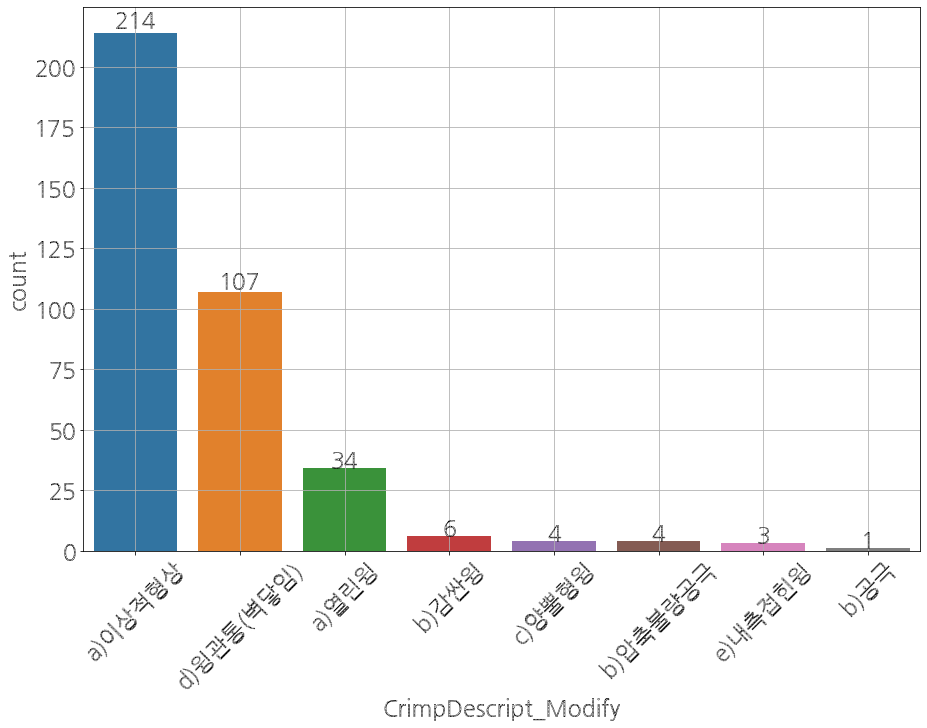

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='CrimpDescript_Modify', data=df, order=df['CrimpDescript_Modify'].value_counts().index)
plt.xticks(rotation=45)
plt.grid(True)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:^.0f}", (left+width/2, height*1.01), ha='center')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    373 non-null    int64  
 1   Terminal_No           373 non-null    object 
 2   CCW                   373 non-null    float64
 3   CCH                   373 non-null    float64
 4   Tensile_Str           373 non-null    float64
 5   Contact_Res           373 non-null    float64
 6   Defect_Det            373 non-null    int64  
 7   Defect_Code           339 non-null    object 
 8   Crimp_Descript        373 non-null    object 
 9   CrimpDescript_Modify  373 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 29.3+ KB


# 판정코드 별로 독립변수의 상관성 분석
- 판정코드에 따른 산점도 그래프
- ↘ 대각선 그래프의 전체적인 파형이 비슷하다면 의미있는 데이터 (불량/양품 구분하여 봐야함)
- 나머지 산점도는 섞이지 않고 구분되는 것이 의미있는 데이터


*
N=불량, O=양품

*
CCW=압착폭, CCH=압착높이, Tensile_Str=인장강도, Contact_Res=접촉저항, Defect_Det=판정_불량0양품1 

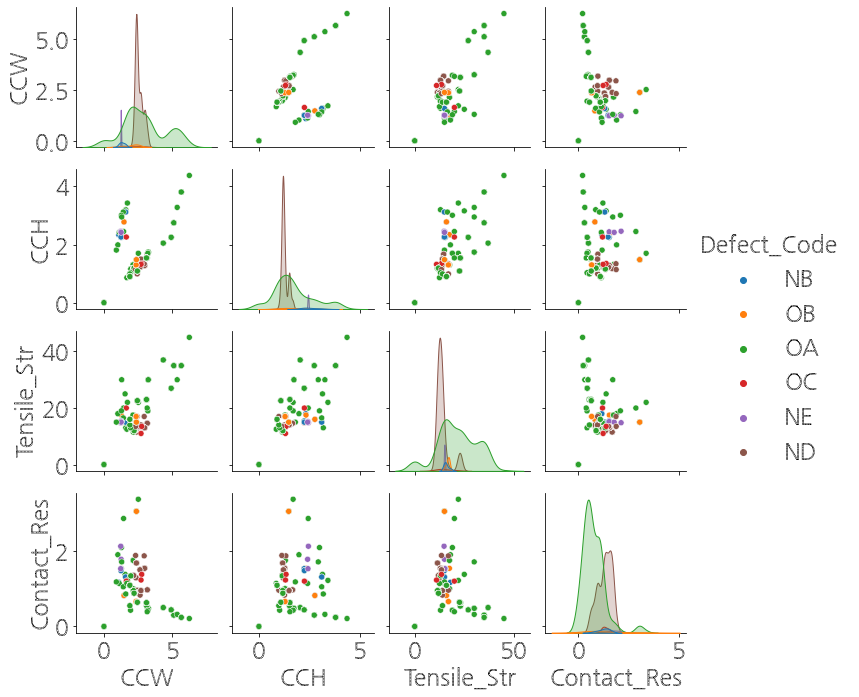

In [ ]:
column_names = ['CCW','CCH', 'Tensile_Str', 'Contact_Res', 'Defect_Code']
sns.pairplot(df[column_names], hue='Defect_Code')

# 불량/양품 별 조사
- 불량, 양품에 따른 산점도 그래프
- ↘ 대각선 그래프에서 0, 1의 모양이 비슷하다면 의미있는 데이터 
- 나머지 산점도는 섞이지 않고 구분되는 것이 의미있는 데이터


*
CCW=압착폭, CCH=압착높이, Tensile_Str=인장강도, Contact_Res=접촉저항, Defect_Det=판정_불량0양품1


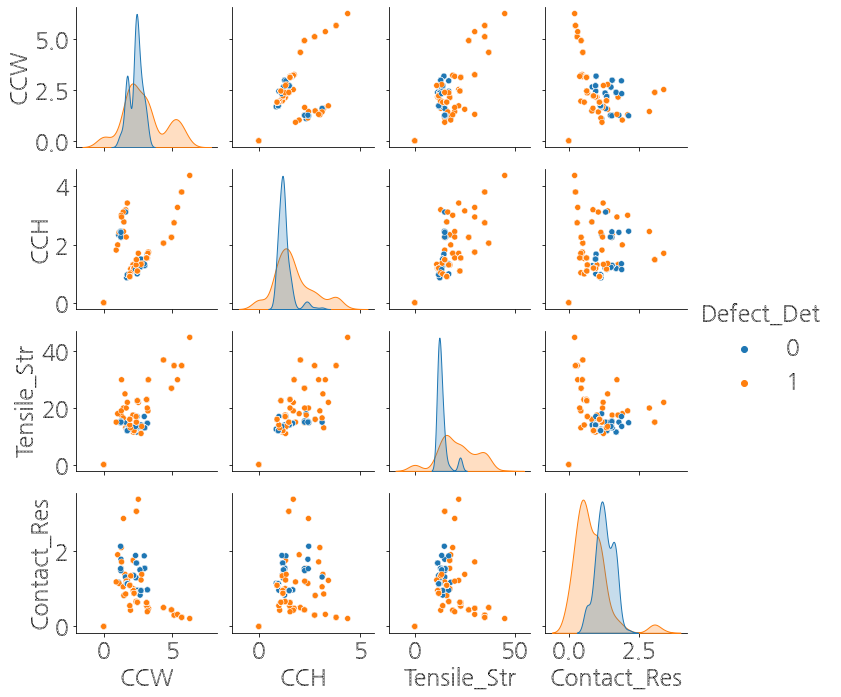

In [ ]:
column_names1 = ['CCW','CCH', 'Tensile_Str', 'Contact_Res', 'Defect_Det']
sns.pairplot(df[column_names1], hue='Defect_Det')

#Heatmap으로 변수간 상관계수 표현

- 압착폭, 압착높이, 인장강도, 접촉저항, 판정_불량0양품1 사이의 상관관계를 표현한 것
- 

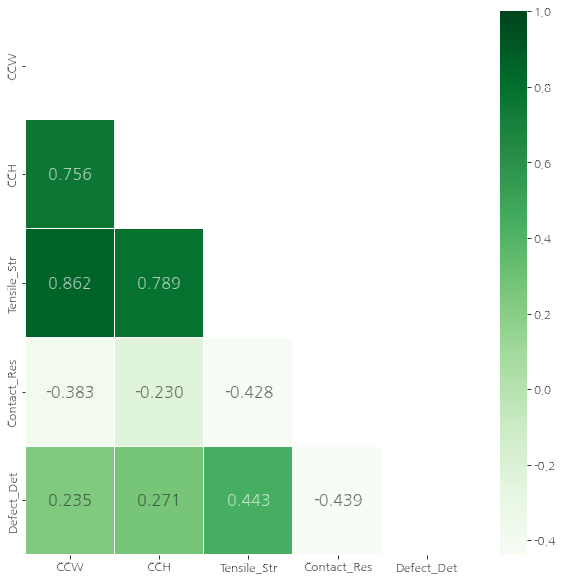

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10, 10)
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = dataset.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')

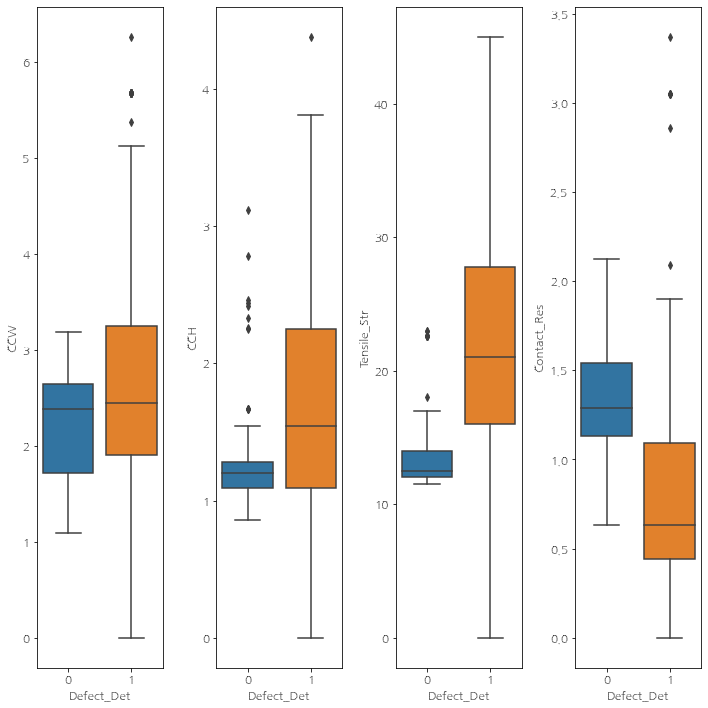

In [ ]:
for i, column in enumerate(column_names1[:-1]):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x='Defect_Det', y=column, data=df)
plt.tight_layout()

 # 2) Box plot 그리기

 - Y(판정코드)

 - X(압착폭, 압착높이, 인장강도, 접촉저항)

In [ ]:
column_names2 = ['CCW','CCH', 'Tensile_Str', 'Contact_Res', 'Defect_Code']

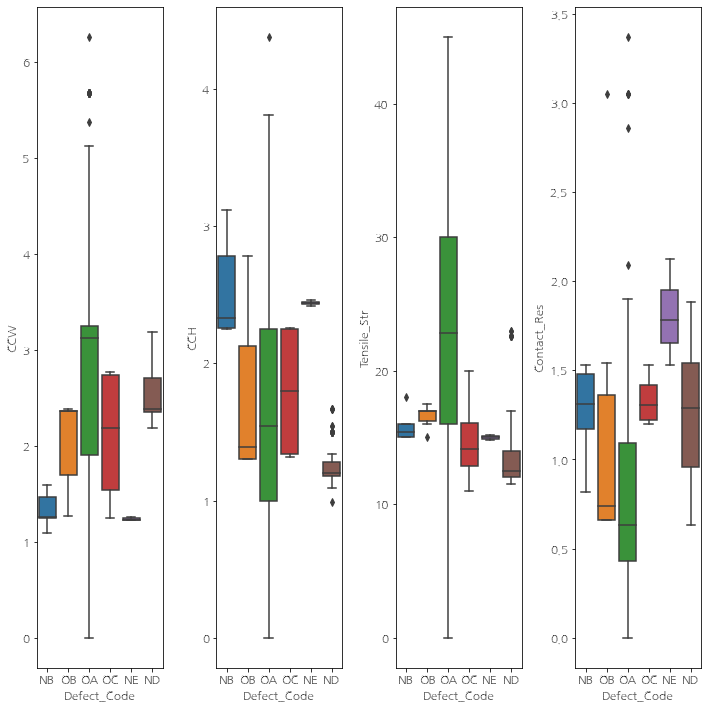

In [ ]:
fig, ax = plt.subplots(ncols=len(column_names2[:-1]))
for i, column in enumerate(column_names2[:-1]):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x='Defect_Code', y=column, data=df)
plt.tight_layout()

#  CFM 데이터 분석

- data2 ~ data200까지 파형을 그림

In [ ]:
cfm_df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, "2.CFM데이터_성창사_210918a.xlsx"))

In [ ]:
cfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Columns: 233 entries, Date/Time to data200
dtypes: datetime64[ns](1), float64(1), int64(227), object(4)
memory usage: 5.3+ MB


In [ ]:
cfm_df.head()

,Date/Time,Good,Bad,Peak,Meas,Tol Index,T1,T1+Tol,T1-Tol,T2,T2+Tol,T2-Tol,T3,T3+Tol,T3-Tol,TD,TDTol,Shift,Meas time mode,Trigger,Trigger Level,Trigger Delay,Auto Meas,Alignment,Right at,Left at,Adaptive,Reset,T1 Start,T2 Start,T3 Start,T3 End,Teach Sample,ForceCurve(Upper row:Refference/Lower Row:Measurement) data1,data2,data3,data4,data5,data6,data7,...,data161,data162,data163,data164,data165,data166,data167,data168,data169,data170,data171,data172,data173,data174,data175,data176,data177,data178,data179,data180,data181,data182,data183,data184,data185,data186,data187,data188,data189,data190,data191,data192,data193,data194,data195,data196,data197,data198,data199,data200
0,2021-03-15 07:58:00,1,0,1897,24,4,27,40,99.9,-11,22,18,1,10,5,41,40,0,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,93,97,106,106,114,136,147,...,11893,11235,10565,9882,9187,8372,7674,6973,6277,5588,4915,4287,3738,3249,2817,2424,2080,1780,1514,1274,1040,868,718,575,451,335,265,189,136,101,73,64,66,60,58,73,76,82,86,91
1,2021-03-15 07:58:00,2,0,1928,24,4,5,40,99.9,5,22,18,18,10,5,29,40,4,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,54,72,77,82,90,97,115,...,12133,11470,10798,10114,9420,8482,7775,7071,6370,5677,4996,4367,3803,3314,2869,2480,2131,1816,1542,1288,1074,880,721,573,447,334,237,169,110,86,61,75,52,68,76,85,70,76,77,74
2,2021-03-15 07:58:00,3,0,1883,24,4,-27,40,99.9,-26,22,18,-14,10,5,67,40,12,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,68,80,85,86,100,115,140,...,12239,11579,10903,10211,9513,8573,7862,7156,6459,5763,5093,4450,3879,3392,2939,2538,2182,1866,1586,1326,1118,917,756,605,475,342,249,179,120,86,58,56,42,50,49,51,43,47,49,49
3,2021-03-15 07:58:00,4,0,1946,24,4,-20,40,99.9,5,22,18,21,10,5,47,40,5,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,65,76,80,82,93,107,131,...,12161,11504,10828,10139,9443,8506,7797,7092,6396,5700,5027,4389,3826,3340,2893,2496,2144,1832,1552,1297,1088,896,738,594,469,338,248,176,123,84,66,63,53,57,56,56,53,49,52,55
4,2021-03-15 07:58:00,5,0,1951,24,4,1,40,99.9,14,22,18,20,10,5,36,40,9,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,55,66,69,71,80,96,119,...,12217,11556,10879,10188,9490,8550,7840,7134,6439,5742,5066,4423,3855,3362,2913,2515,2161,1844,1562,1306,1099,906,745,601,475,344,252,182,130,88,67,65,57,60,59,57,54,50,53,53


In [ ]:
cfm_df['T1-Tol'] = cfm_df['T1-Tol'].replace(99.9, -99.9)
cfm_df['T2-Tol'] = cfm_df['T2-Tol'].replace(18, -18)
cfm_df['T3-Tol'] = cfm_df['T3-Tol'].replace(5, -5)

cfm_df

,Date/Time,Good,Bad,Peak,Meas,Tol Index,T1,T1+Tol,T1-Tol,T2,T2+Tol,T2-Tol,T3,T3+Tol,T3-Tol,TD,TDTol,Shift,Meas time mode,Trigger,Trigger Level,Trigger Delay,Auto Meas,Alignment,Right at,Left at,Adaptive,Reset,T1 Start,T2 Start,T3 Start,T3 End,Teach Sample,ForceCurve(Upper row:Refference/Lower Row:Measurement) data1,data2,data3,data4,data5,data6,data7,...,data161,data162,data163,data164,data165,data166,data167,data168,data169,data170,data171,data172,data173,data174,data175,data176,data177,data178,data179,data180,data181,data182,data183,data184,data185,data186,data187,data188,data189,data190,data191,data192,data193,data194,data195,data196,data197,data198,data199,data200
0,2021-03-15 07:58:00,1,0,1897,24,4,27,40,-99.9,-11,22,-18,1,10,-5,41,40,0,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,93,97,106,106,114,136,147,...,11893,11235,10565,9882,9187,8372,7674,6973,6277,5588,4915,4287,3738,3249,2817,2424,2080,1780,1514,1274,1040,868,718,575,451,335,265,189,136,101,73,64,66,60,58,73,76,82,86,91
1,2021-03-15 07:58:00,2,0,1928,24,4,5,40,-99.9,5,22,-18,18,10,-5,29,40,4,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,54,72,77,82,90,97,115,...,12133,11470,10798,10114,9420,8482,7775,7071,6370,5677,4996,4367,3803,3314,2869,2480,2131,1816,1542,1288,1074,880,721,573,447,334,237,169,110,86,61,75,52,68,76,85,70,76,77,74
2,2021-03-15 07:58:00,3,0,1883,24,4,-27,40,-99.9,-26,22,-18,-14,10,-5,67,40,12,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,68,80,85,86,100,115,140,...,12239,11579,10903,10211,9513,8573,7862,7156,6459,5763,5093,4450,3879,3392,2939,2538,2182,1866,1586,1326,1118,917,756,605,475,342,249,179,120,86,58,56,42,50,49,51,43,47,49,49
3,2021-03-15 07:58:00,4,0,1946,24,4,-20,40,-99.9,5,22,-18,21,10,-5,47,40,5,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,65,76,80,82,93,107,131,...,12161,11504,10828,10139,9443,8506,7797,7092,6396,5700,5027,4389,3826,3340,2893,2496,2144,1832,1552,1297,1088,896,738,594,469,338,248,176,123,84,66,63,53,57,56,56,53,49,52,55
4,2021-03-15 07:58:00,5,0,1951,24,4,1,40,-99.9,14,22,-18,20,10,-5,36,40,9,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,55,66,69,71,80,96,119,...,12217,11556,10879,10188,9490,8550,7840,7134,6439,5742,5066,4423,3855,3362,2913,2515,2161,1844,1562,1306,1099,906,745,601,475,344,252,182,130,88,67,65,57,60,59,57,54,50,53,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,2021-03-15 09:46:00,536,1,1912,24,4,-24,40,-99.9,-1,22,-18,-13,10,-5,39,40,25,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,65,66,66,66,70,91,119,...,11611,10923,10226,9527,8745,7868,7158,6451,5749,5062,4420,3855,3356,2913,2511,2162,1850,1570,1323,1106,924,761,617,492,380,285,208,135,92,74,64,63,62,63,61,60,57,58,59,62
2998,2021-03-15 09:46:00,537,1,1928,24,4,-22,40,-99.9,-31,22,-18,-10,10,-5,64,40,24,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,66,68,68,70,73,94,122,...,11594,10907,10210,9515,8759,7857,7152,6445,5743,5056,4416,3851,3355,2912,2511,2165,1853,1572,1325,1108,926,764,620,494,382,287,209,136,93,75,65,63,62,62,59,57,54,53,54,58
2999,2021-03-15 09:46:00,538,1,1913,24,4,-4,40,-99.9,-6,22,-18,-12,10,-5,23,40,23,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,70,72,73,74,76,94,120,...,11586,10899,10203,9508,8752,7852,7147,6440,5740,5054,4414,3849,3353,2910,2510,2164,1851,1569,1321,1103,921,757,613,487,376,279,203,129,86,68,59,57,58,58,55,55,51,51,53,55
3000,2021-03-15 09:46:00,539,1,1918,24,4,-24,40,-99.9,3,22,-18,-10,10,-5,39,40,21,Auto,Auto,100,0,0,OFF,40,70,ON,3,5,30,70,90,2,69,71,72,72,76,93,120,...,11577,10889,10196,9498,8719,7842,7134,6425,5725,5038,4400,3838,3343,2901,2503,2158,1846,1566,1318,1100,919,756,611,487,375,279,202,129,85,67,59,58,59,58,57,57,53,53,54,53


CFM데이타 불량률 계산

불량률 = bad / (good + bad)

In [ ]:
cfm_df['failure_rate'] = cfm_df['Bad'] / (cfm_df['Good'] + cfm_df['Bad'])
cfm_df['failure_rate'].describe()

count    3002.000000
mean        0.010017
std         0.038972
min         0.000000
25%         0.000000
50%         0.000000
75%         0.004287
max         0.750000
Name: failure_rate, dtype: float64

## 전체 불량률 비율
- 20개 미만의 데이터는 분석의 의미가 앖으므로 7%이하의 데이터로 분석함

In [ ]:
import numpy as np
bins = np.arange(0.0, 1.1, 0.01)
bins_label = [f'{x:.2f} <= x < {x+0.01:.2f}' for x in bins]
cfm_df['failure_level'] = np.digitize(cfm_df['failure_rate'], bins, right=False)
cfm_df['failure_level'] = cfm_df['failure_level'].map(lambda x:bins_label[x-1])
cfm_df['failure_level'].value_counts()

0.00 <= x < 0.01    2484
0.01 <= x < 0.02     133
0.02 <= x < 0.03     125
0.03 <= x < 0.04      68
0.04 <= x < 0.05      60
0.05 <= x < 0.06      45
0.06 <= x < 0.07      22
0.11 <= x < 0.12       8
0.12 <= x < 0.13       7
0.10 <= x < 0.11       5
0.13 <= x < 0.14       5
0.14 <= x < 0.15       5
0.16 <= x < 0.17       4
0.07 <= x < 0.08       3
0.50 <= x < 0.51       3
0.15 <= x < 0.16       3
0.09 <= x < 0.10       2
0.33 <= x < 0.34       1
0.20 <= x < 0.21       1
0.30 <= x < 0.31       1
0.21 <= x < 0.22       1
0.22 <= x < 0.23       1
0.66 <= x < 0.67       1
0.44 <= x < 0.45       1
0.18 <= x < 0.19       1
0.57 <= x < 0.58       1
0.19 <= x < 0.20       1
0.25 <= x < 0.26       1
0.60 <= x < 0.61       1
0.75 <= x < 0.76       1
0.40 <= x < 0.41       1
0.23 <= x < 0.24       1
0.08 <= x < 0.09       1
0.17 <= x < 0.18       1
0.26 <= x < 0.27       1
0.36 <= x < 0.37       1
0.28 <= x < 0.29       1
Name: failure_level, dtype: int64

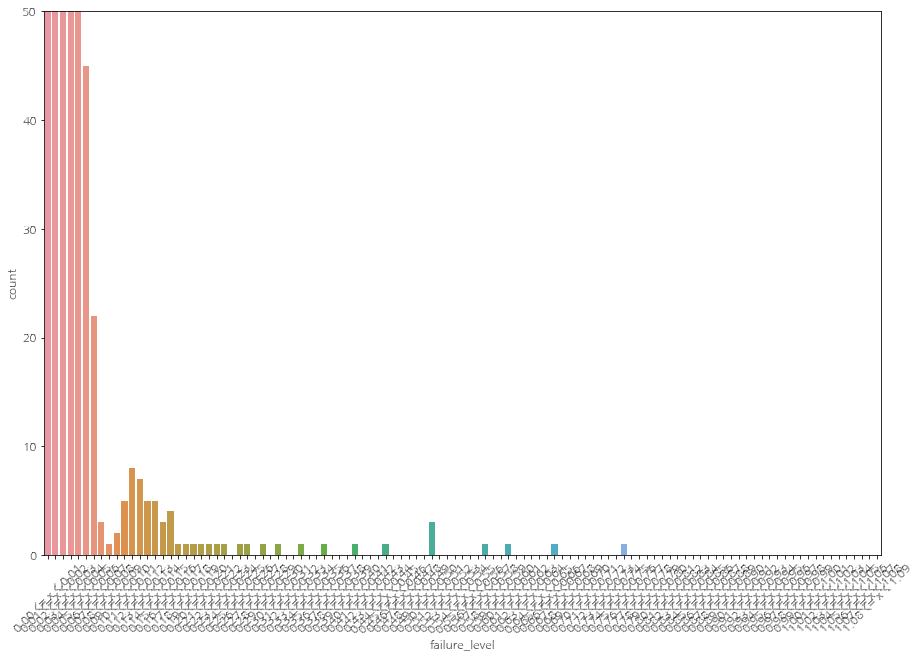

In [ ]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.ylim(top=50)
sns.countplot(x='failure_level', data=cfm_df, order=bins_label[0:-1])
plt.show()

In [ ]:
cfm_df['failure_level'].value_counts()

0.00 <= x < 0.01    2484
0.01 <= x < 0.02     133
0.02 <= x < 0.03     125
0.03 <= x < 0.04      68
0.04 <= x < 0.05      60
0.05 <= x < 0.06      45
0.06 <= x < 0.07      22
0.11 <= x < 0.12       8
0.12 <= x < 0.13       7
0.10 <= x < 0.11       5
0.13 <= x < 0.14       5
0.14 <= x < 0.15       5
0.16 <= x < 0.17       4
0.07 <= x < 0.08       3
0.50 <= x < 0.51       3
0.15 <= x < 0.16       3
0.09 <= x < 0.10       2
0.33 <= x < 0.34       1
0.20 <= x < 0.21       1
0.30 <= x < 0.31       1
0.21 <= x < 0.22       1
0.22 <= x < 0.23       1
0.66 <= x < 0.67       1
0.44 <= x < 0.45       1
0.18 <= x < 0.19       1
0.57 <= x < 0.58       1
0.19 <= x < 0.20       1
0.25 <= x < 0.26       1
0.60 <= x < 0.61       1
0.75 <= x < 0.76       1
0.40 <= x < 0.41       1
0.23 <= x < 0.24       1
0.08 <= x < 0.09       1
0.17 <= x < 0.18       1
0.26 <= x < 0.27       1
0.36 <= x < 0.37       1
0.28 <= x < 0.29       1
Name: failure_level, dtype: int64

## 불량률 7% 이내의 데이터 전체를 그린 그래프

- 0.00 <= x < 0.01
- 0.01 <= x < 0.02
- 0.02 <= x < 0.03
- 0.03 <= x < 0.04
- 0.04 <= x < 0.05
- 0.05 <= x < 0.06
- 0.06 <= x < 0.07

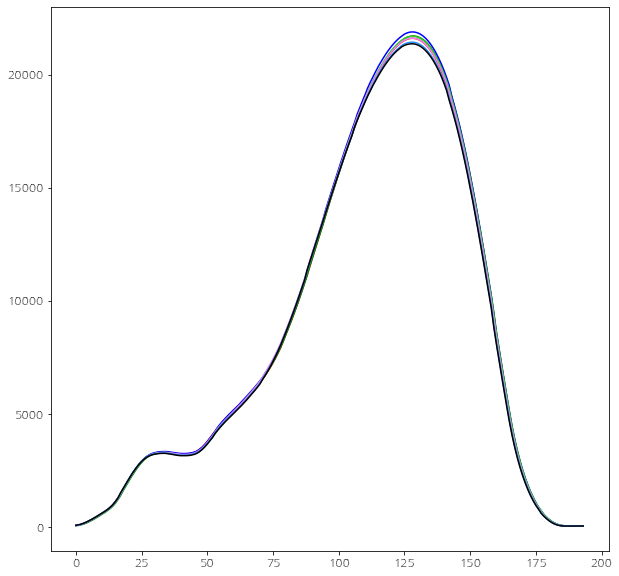

In [ ]:
mean_df = cfm_df.groupby(['failure_level'], as_index=False).mean()

# 0.00 <= x < 0.01    2484
plt.plot(list(mean_df.iloc[0])[34:228], 'r')

# 0.01 <= x < 0.02     133
plt.plot(list(mean_df.iloc[1])[34:228], 'g')

# 0.02 <= x < 0.03     125
plt.plot(list(mean_df.iloc[2])[34:228], 'b')

# 0.03 <= x < 0.04      68
plt.plot(list(mean_df.iloc[3])[34:228], color='limegreen')

# 0.04 <= x < 0.05      60
plt.plot(list(mean_df.iloc[4])[34:228], color='violet')

# 0.05 <= x < 0.06      45
plt.plot(list(mean_df.iloc[5])[34:228], color='dodgerblue')

# 0.06 <= x < 0.07      22
plt.plot(list(mean_df.iloc[6])[34:228], color='#000000')

### 위의 그래프를 확대한 모습
- 빨간선이 1%미만의 불량률
- 이외의 1%이상의 불량률을 나타냄
- 위의 그래프에서는 세로축이 5000단위이기 때문에 차이가 없어보이지만 아래와 같이 확대한 모습을 봤을때 700이상의 차이가 나는 것을 볼수 있음

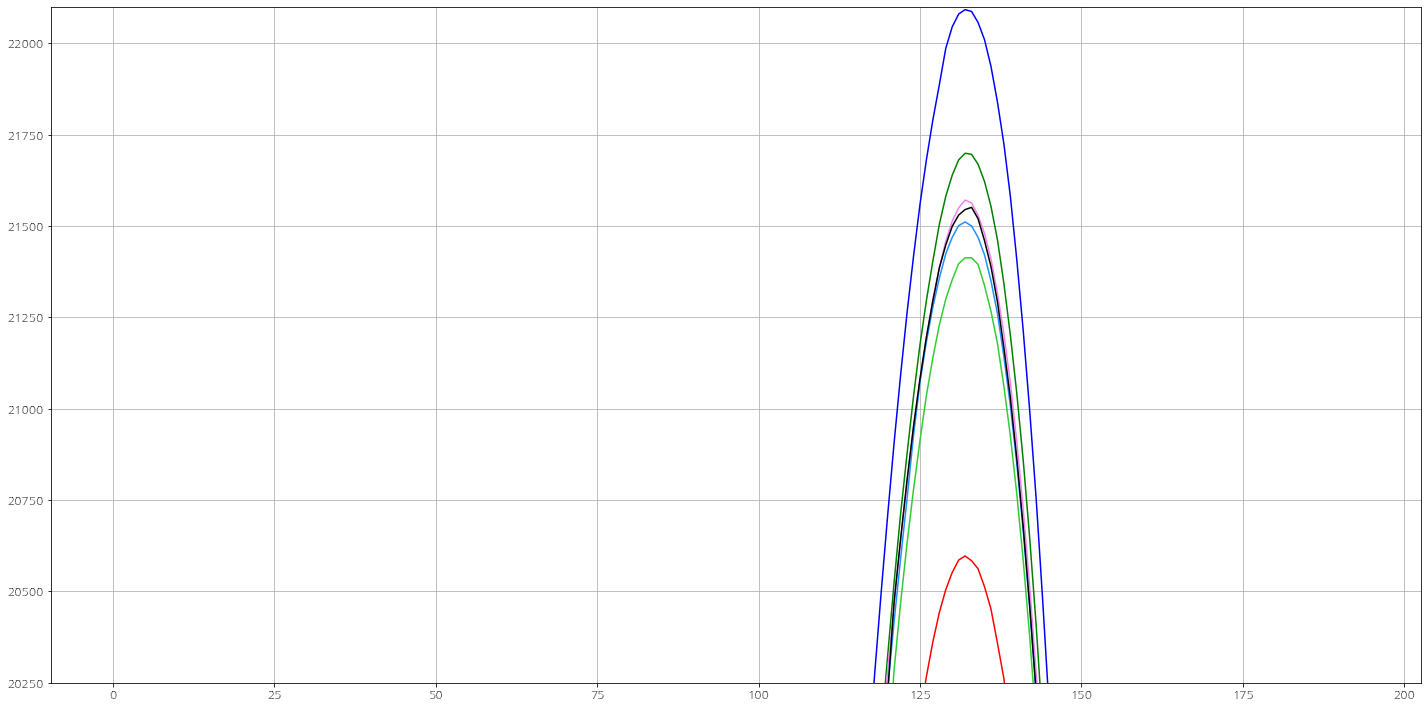

In [ ]:
plt.figure(figsize=(20, 10))
plt.ylim(bottom=20250, top=22100)
plt.grid()

temp_df = cfm_df[cfm_df['failure_level'] == '0.00 <= x < 0.01']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], 'r')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.01 <= x < 0.02']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], 'g')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.02 <= x < 0.03']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], 'b')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.03 <= x < 0.04']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], color='limegreen')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.04 <= x < 0.05']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], color='violet')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.05 <= x < 0.06']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], color='dodgerblue')
  break

temp_df = cfm_df[cfm_df['failure_level'] == '0.06 <= x < 0.07']
for i in range(len(temp_df)):
  plt.plot(list(temp_df.iloc[i])[34:228], color='#000000')
  break

save_fig('temp')

## Peak, T1, T2, T3 히스토그램

(array([2.500e+01, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.600e+01,
        6.000e+00, 2.949e+03, 4.000e+00, 1.000e+00]),
 array([ 168.,  406.,  644.,  882., 1120., 1358., 1596., 1834., 2072.,
        2310., 2548.]),
 <a list of 10 Patch objects>)

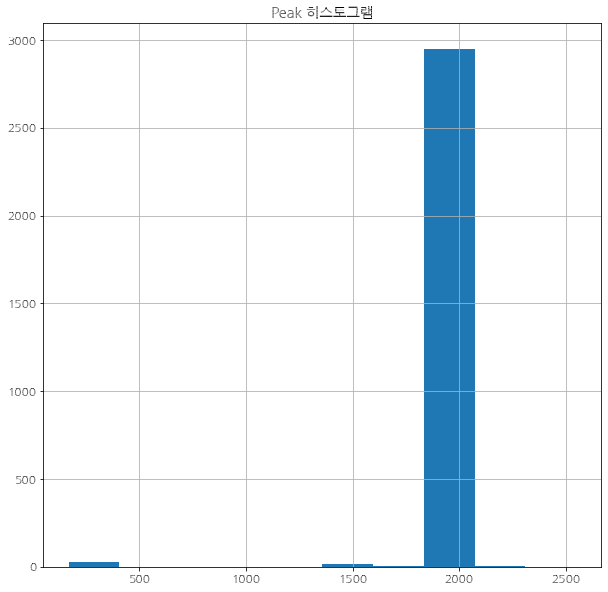

In [ ]:
plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Peak 히스토그램')
plt.hist(cfm_df['Peak'])

(array([2.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 4.720e+02,
        2.496e+03, 4.000e+00, 0.000e+00, 2.000e+00]),
 array([-984. , -823.3, -662.6, -501.9, -341.2, -180.5,  -19.8,  140.9,
         301.6,  462.3,  623. ]),
 <a list of 10 Patch objects>)

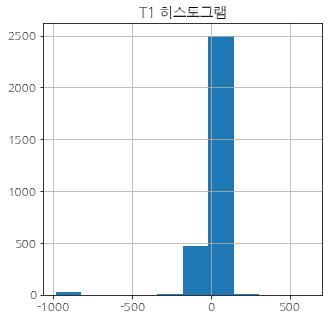

In [ ]:
plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T1 히스토그램')
plt.hist(cfm_df['T1'])

(array([2.500e+01, 0.000e+00, 0.000e+00, 3.000e+00, 1.600e+01, 2.942e+03,
        1.500e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-995. , -819.2, -643.4, -467.6, -291.8, -116. ,   59.8,  235.6,
         411.4,  587.2,  763. ]),
 <a list of 10 Patch objects>)

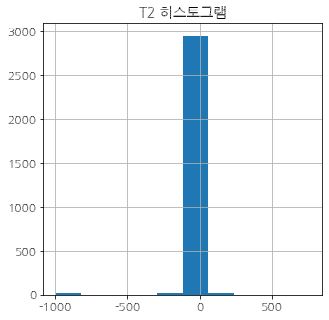

In [ ]:
plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T2 히스토그램')
plt.hist(cfm_df['T2'])

(array([2.500e+01, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.400e+01,
        1.300e+01, 2.946e+03, 0.000e+00, 1.000e+00]),
 array([-974. , -841.1, -708.2, -575.3, -442.4, -309.5, -176.6,  -43.7,
          89.2,  222.1,  355. ]),
 <a list of 10 Patch objects>)

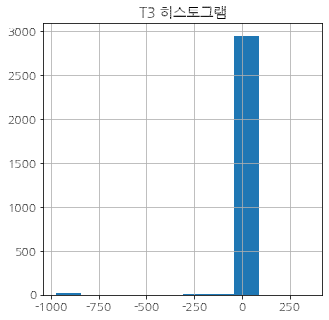

In [ ]:
plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T3 히스토그램')
plt.hist(cfm_df['T3'])

## **T1, T2, T3의 그래프**

In [ ]:
# T1 튀는 값 데이터 프레임
fail1_t1 = cfm_df['T1'] < -99.9
fail2_t1 = cfm_df['T1'] > 40

fail_t1_df = cfm_df[fail1_t1 | fail2_t1]


# T2 튀는 값 데이터 프레임
fail1_t2 = cfm_df['T2'] < -18
fail2_t2 = cfm_df['T2'] > 22

fail_t2_df = cfm_df[fail1_t2 | fail2_t2]


# T3 튀는 값 데이터 프레임
fail1_t3 = cfm_df['T3'] < -5
fail2_t3 = cfm_df['T3'] > 10

fail_t3_df = cfm_df[fail1_t3 | fail2_t3]

### **T1의 상한 하한값에 대해 범위를 넘는 값 표현**
* scatter
* plot

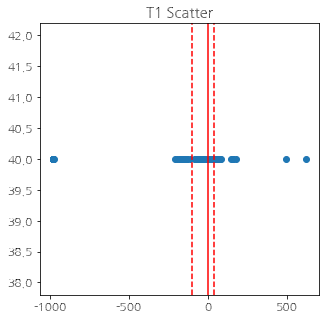

In [ ]:
plt.title('T1 Scatter')
plt.scatter(cfm_df['T1'], cfm_df['T1+Tol'])

plt.axvline(color='r')
plt.axvline(cfm_df['T1+Tol'].mean(), color='r', linestyle='--')
plt.axvline(cfm_df['T1-Tol'].mean(),color='r', linestyle='--')

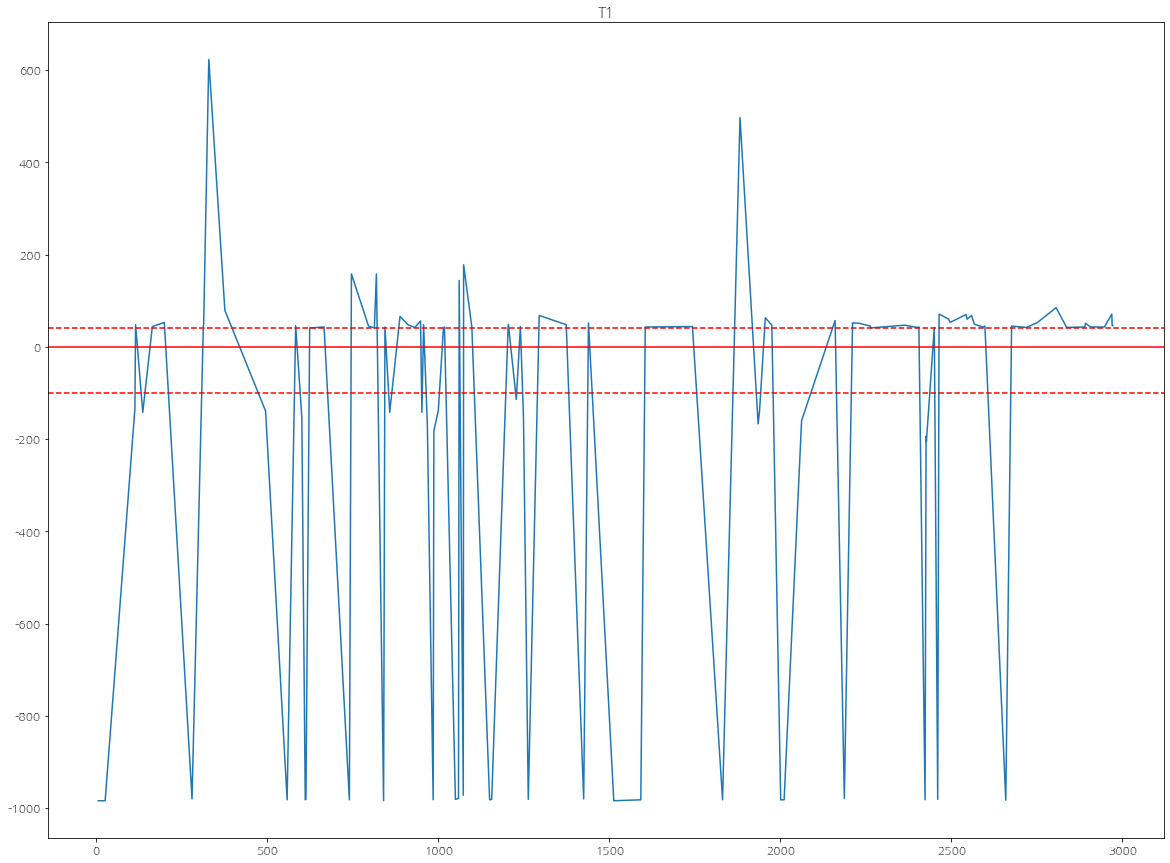

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(fail_t1_df['T1'])
plt.title('T1')

plt.axhline(color='r')
plt.axhline(cfm_df['T1+Tol'].mean(), color='r', linestyle='--')
plt.axhline(cfm_df['T1-Tol'].mean(),color='r', linestyle='--')

### **T2의 상한 하한값에 대해 범위를 넘는 값 표현**
* scatter
* plot

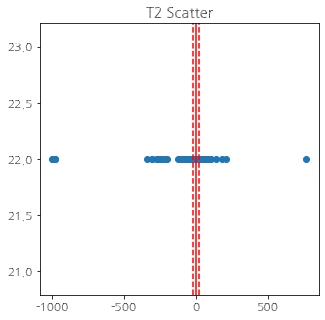

In [ ]:
plt.title('T2 Scatter')
plt.scatter(cfm_df['T2'], cfm_df['T2+Tol'])

plt.axvline(color='r')
plt.axvline(cfm_df['T2+Tol'].mean(), color='r', linestyle='--')
plt.axvline(cfm_df['T2-Tol'].mean(),color='r', linestyle='--')

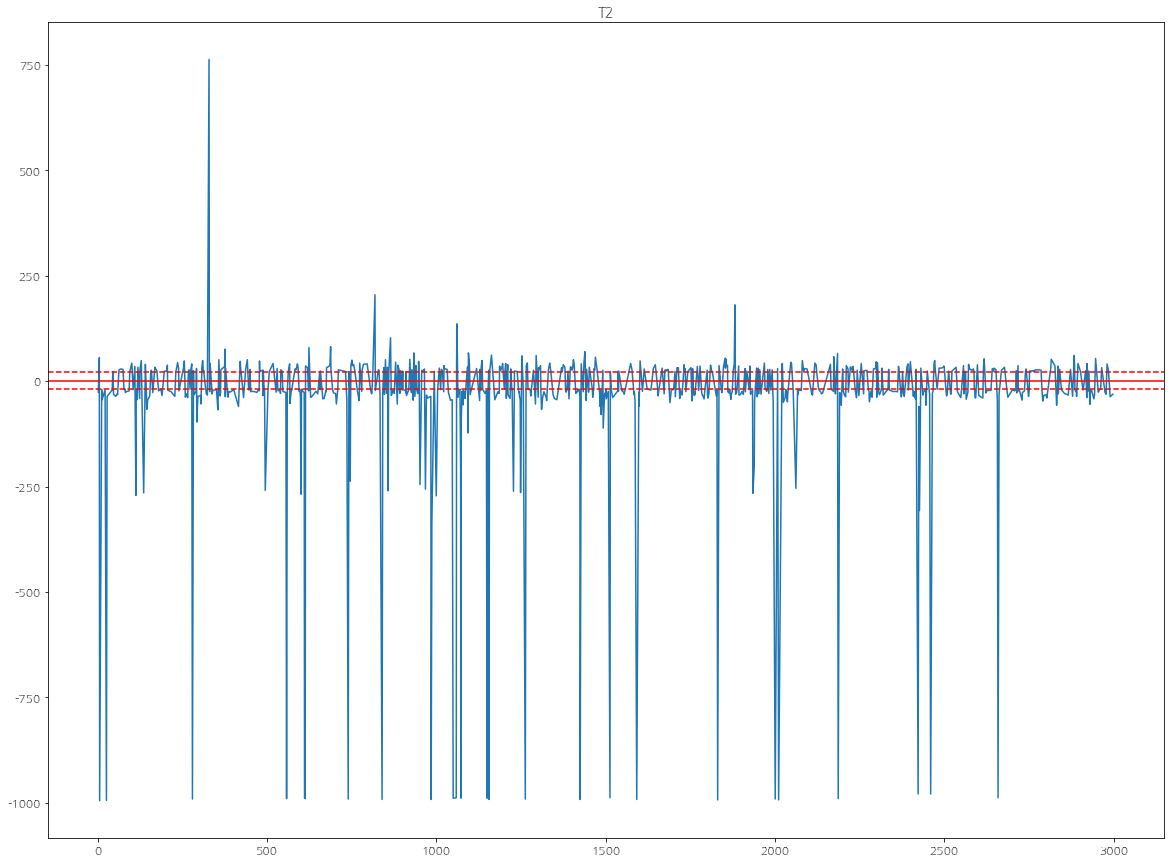

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(fail_t2_df['T2'])
plt.title('T2')

plt.axhline(color='r')
plt.axhline(cfm_df['T2+Tol'].mean(), color='r', linestyle='--')
plt.axhline(cfm_df['T2-Tol'].mean(),color='r', linestyle='--')

### **T3의 상한 하한값에 대해 범위를 넘는 값 표현**
* scatter
* plot

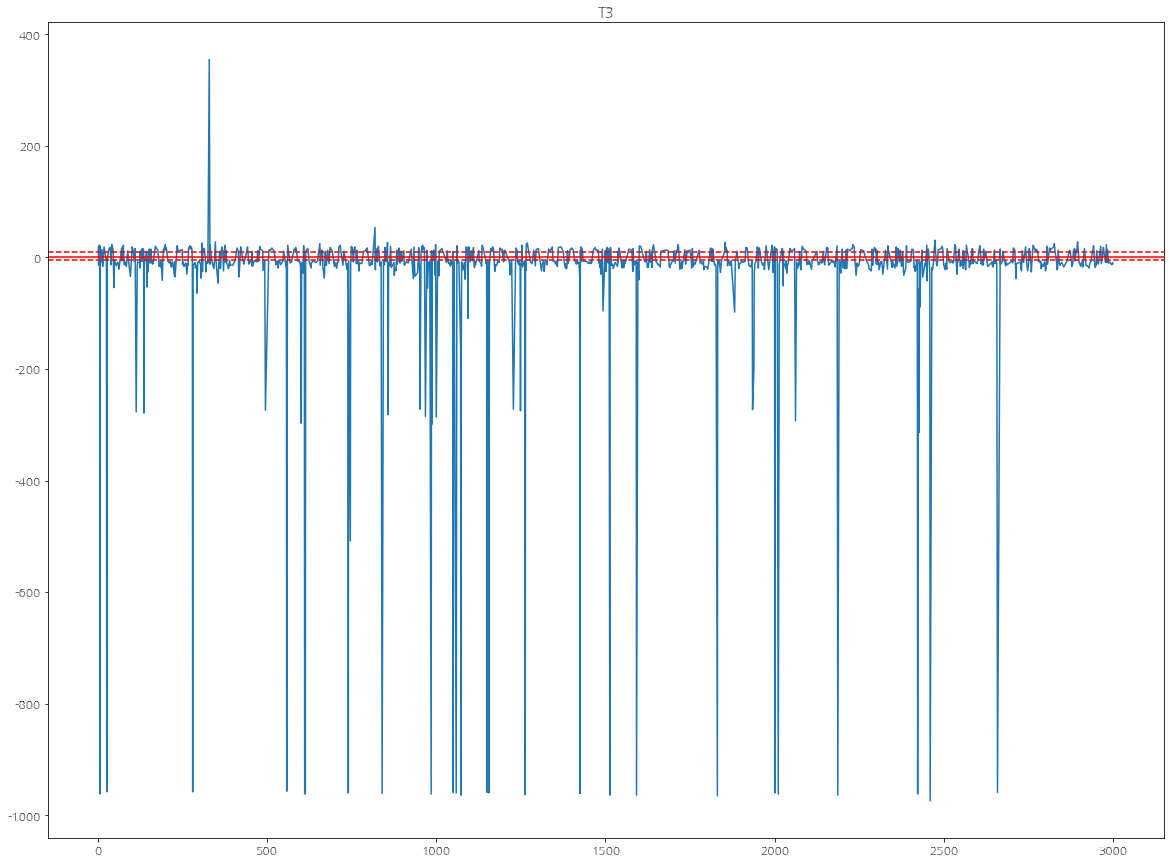

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(fail_t3_df['T3'])
plt.title('T3')
plt.axhline(color='r')
plt.axhline(cfm_df['T3+Tol'].mean(), color='r', linestyle='--')
plt.axhline(cfm_df['T3-Tol'].mean(),color='r', linestyle='--')

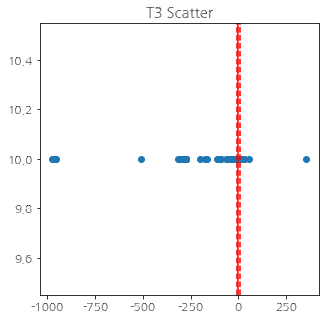

In [ ]:
plt.title('T3 Scatter')
plt.scatter(cfm_df['T3'], cfm_df['T3+Tol'])

plt.axvline(color='r')
plt.axvline(cfm_df['T3+Tol'].mean(), color='r', linestyle='--')
plt.axvline(cfm_df['T3-Tol'].mean(),color='r', linestyle='--')

### **상한, 하한 이탈값 표**

 **T1 이탈값 표**

In [ ]:
T1_count_df = pd.DataFrame({ '상한 이탈':len(cfm_df[fail2_t1].index),
                  '하한 이탈':len(cfm_df[fail1_t1].index),
                  '합계':len(fail_t1_df.index)},
                  index = ['T1'],
                  )
T1_count_df.transpose()

,T1
상한 이탈,66
하한 이탈,41
합계,107


**T2 이탈값 표**

In [ ]:
T2_count_df = pd.DataFrame({ '상한 이탈':len(cfm_df[fail2_t2].index),
                  '하한 이탈':len(cfm_df[fail1_t2].index),
                  '합계':len(fail_t2_df.index)},
                  index = ['T2']
                  )
T2_count_df.transpose()

,T2
상한 이탈,343
하한 이탈,522
합계,865


**T3 이탈값 표**

In [ ]:
T3_count_df = pd.DataFrame({ '상한 이탈':len(cfm_df[fail2_t3].index),
                  '하한 이탈':len(cfm_df[fail1_t3].index),
                  '합계':len(fail_t3_df.index)},
                  index = ['T3']
                  )
T3_count_df.transpose()

,T3
상한 이탈,420
하한 이탈,784
합계,1204


**T1, T2, T3 합친 표**


In [ ]:
all_count_df = pd.DataFrame({ '상한 이탈':[len(cfm_df[fail2_t1].index), len(cfm_df[fail2_t2].index), len(cfm_df[fail2_t3].index)],
                  '하한 이탈':[len(cfm_df[fail1_t1].index), len(cfm_df[fail1_t2].index), len(cfm_df[fail1_t3].index)],
                  '합계':[len(fail_t1_df.index), len(fail_t2_df.index), len(fail_t3_df.index)]},
                  index = [' T1', 'T2', 'T3']
                  )
all_count_df.transpose()

,T1,T2,T3
상한 이탈,66,343,420
하한 이탈,41,522,784
합계,107,865,1204


## T1, T2, T3가 튀는 값일때 불량률 1%인 데이터의 파형
* 육안상으로는 그 차이를 확인하기가 어려움
*  T1, T2, T3가 튀는 값일때 불량률 1%인 데이터의 파형을 하나로 모은 것 
* T1 = 빨간선, T2 = 파란선, T3 = 초록선

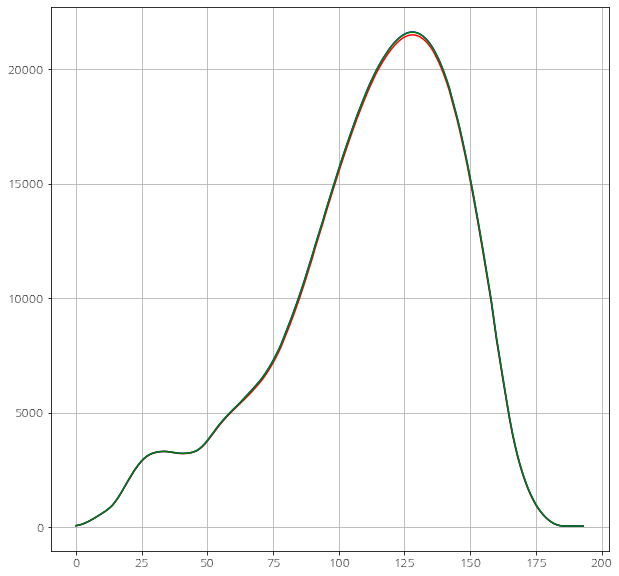

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()

t1_mean_df = fail_t1_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t1_mean_df.iloc[0])[34:228], 'r')

t2_mean_df = fail_t2_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t2_mean_df.iloc[0])[34:228], 'b')

t3_mean_df = fail_t3_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t3_mean_df.iloc[0])[34:228], 'g')

### 정점부분을 확대해서 확인
 -  T1은 T2, T3와 100이상 차이가 남
 -  T2, T3는 서로 10정도 차이가 남 즉, 거의 동일한 상태

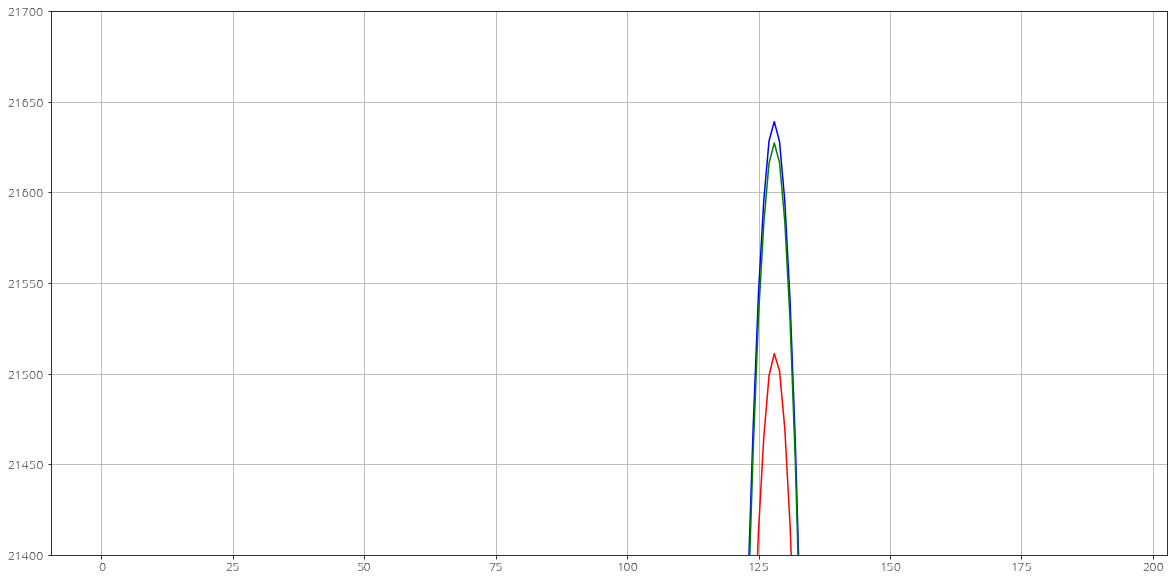

In [ ]:
# 위의 차이 확인을 위한 확대
# T1 = 빨간선, T2 = 파란선, T3 = 초록선
# T2, T3는 거의 차이가 없음

plt.figure(figsize=(20,10))
plt.ylim(bottom=21400, top=21700)
plt.grid()

t1_mean_df = fail_t1_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t1_mean_df.iloc[0])[34:228], 'r')

t2_mean_df = fail_t2_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t2_mean_df.iloc[0])[34:228], 'b')

t3_mean_df = fail_t3_df.groupby(['failure_level'], as_index=False).mean()
plt.plot(list(t3_mean_df.iloc[0])[34:228], 'g')

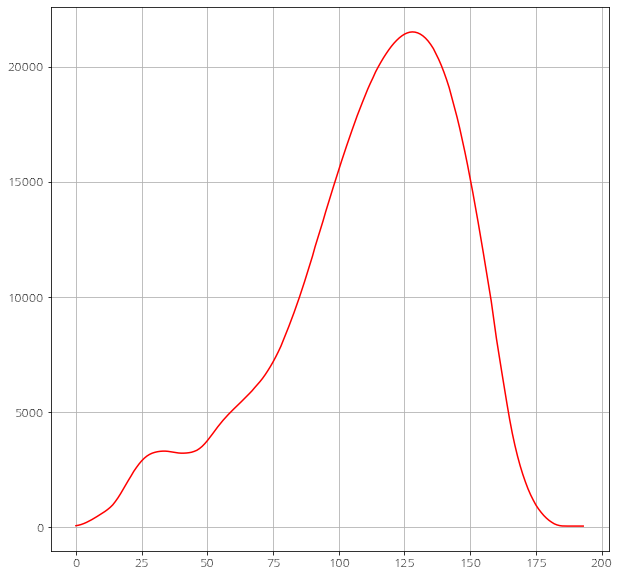

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
t1_mean_df = fail_t1_df.groupby(['failure_level'], as_index=False).mean()

# 0.00 <= x < 0.01    2484
plt.plot(list(t1_mean_df.iloc[0])[34:228], 'r')

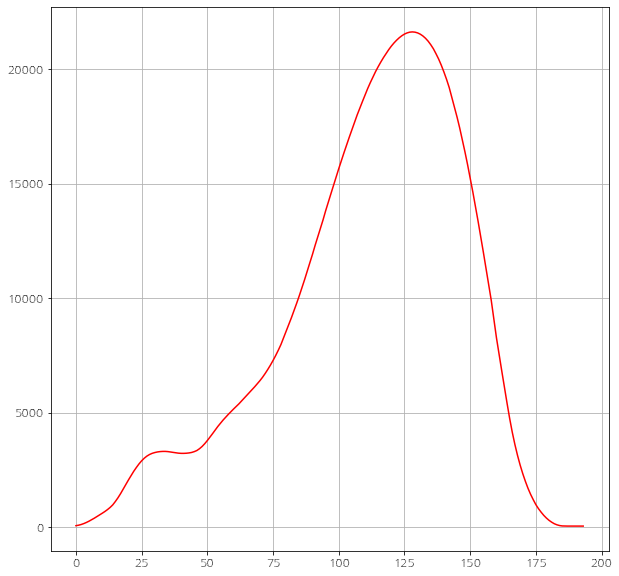

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
t2_mean_df = fail_t2_df.groupby(['failure_level'], as_index=False).mean()

# 0.00 <= x < 0.01    2484
plt.plot(list(t2_mean_df.iloc[0])[34:228], 'r')

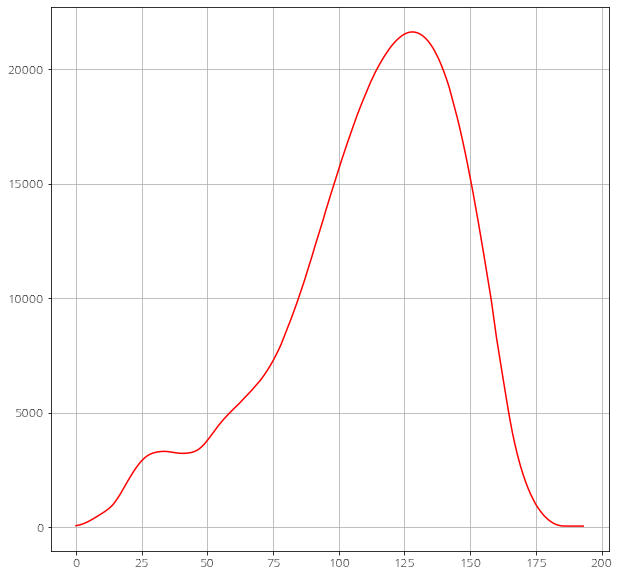

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
t3_mean_df = fail_t3_df.groupby(['failure_level'], as_index=False).mean()

# 0.00 <= x < 0.01    2484
plt.plot(list(t3_mean_df.iloc[0])[34:228], 'r')

In [ ]:
# T1, T2, T3 튀는 값 나올때의 전체 데이터 프레임
all_failure = cfm_df [(fail1_t1 | fail2_t1) | (fail1_t2 | fail2_t2) | (fail1_t3 | fail2_t3)]
all_mean_df = all_failure.groupby(['failure_level'], as_index=False).mean()

#분석이 필요한 컬럼만 골라내기 
failure_names = ['failure_rate', 'T1', 'T2', 'T3']
all_mean_df = all_mean_df[failure_names]

## 불량률과 T1, T2, T3의 튀는 값 사이의 상관성 분석

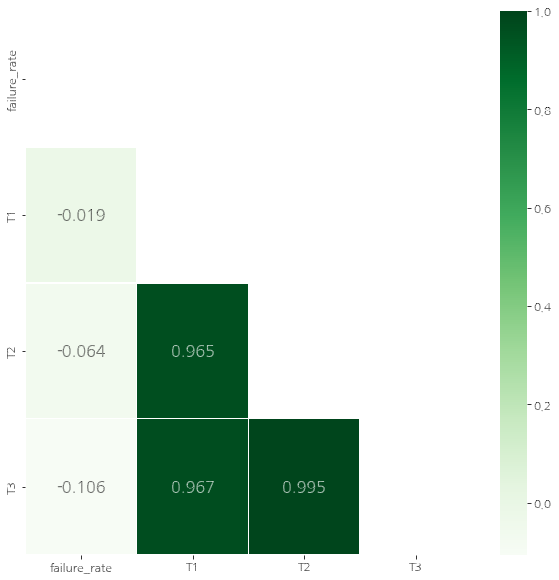

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10, 10)
mask = np.zeros_like(all_mean_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = all_mean_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')

## T1, T2, T3 음의 값 제거후 히스토그램

(array([1.446e+03, 8.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  63.2, 125.4, 187.6, 249.8, 312. , 374.2, 436.4, 498.6,
        560.8, 623. ]),
 <a list of 10 Patch objects>)

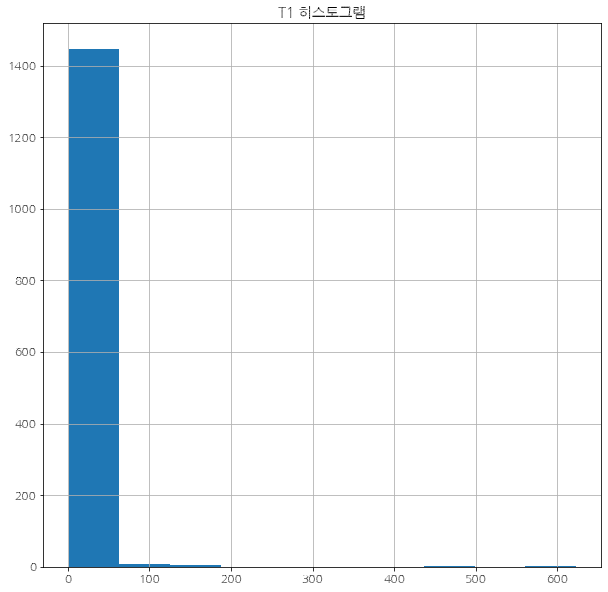

In [ ]:
cfmT1=(cfm_df.T1 > 0)
cfmT1_df = cfm_df[cfmT1]

plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T1 히스토그램')
plt.hist(cfmT1_df['T1'])

(array([1.374e+03, 4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  77.2, 153.4, 229.6, 305.8, 382. , 458.2, 534.4, 610.6,
        686.8, 763. ]),
 <a list of 10 Patch objects>)

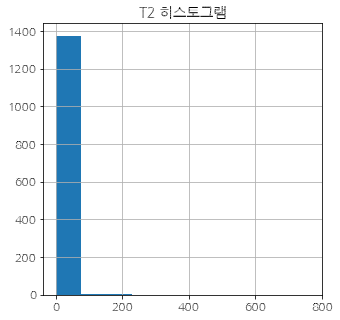

In [ ]:
cfmT2=(cfm_df.T2 > 0)
cfmT2_df = cfm_df[cfmT2]

plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T2 히스토그램')
plt.hist(cfmT2_df['T2'])

(array([1.424e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  36.4,  71.8, 107.2, 142.6, 178. , 213.4, 248.8, 284.2,
        319.6, 355. ]),
 <a list of 10 Patch objects>)

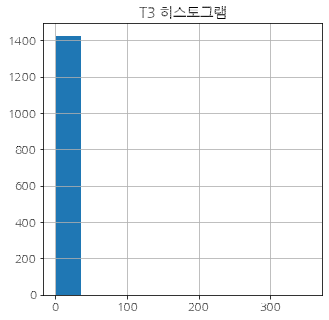

In [ ]:
cfmT3=(cfm_df.T3 > 0)
cfmT3_df = cfm_df[cfmT3]

plt.grid()
plt.rcParams["figure.figsize"] = (5,5)
plt.title('T3 히스토그램')
plt.hist(cfmT3_df['T3'])

#CVM 데이터 분석
- 심선전단, 심선바렐, 피복전단, 피복바렐
    - 상관성, 히트맵
- 심선바렐,피복바렐
    - 좌우 대칭 파악


In [ ]:
cvm_df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR, "3.CVM데이터_성창사_210923a.xlsx"),
                       header=0,
                       skiprows=1)

In [ ]:
cvm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Check_Date   122 non-null    int64  
 1   Check_time   122 non-null    int64  
 2   Terminal_No  122 non-null    int64  
 3   Model_No     122 non-null    object 
 4   Det_CS       122 non-null    object 
 5   CS_H         122 non-null    float64
 6   CS_W         122 non-null    float64
 7   Det_CB       122 non-null    object 
 8   CB_LW        122 non-null    float64
 9   CB_RW        122 non-null    float64
 10  Det_SS       122 non-null    object 
 11  SS_H         122 non-null    float64
 12  SS_W         122 non-null    float64
 13  Det_SB       122 non-null    object 
 14  SB_W         122 non-null    float64
 15  SB_LW        122 non-null    float64
 16  SB_RW        122 non-null    float64
 17  Sheath       122 non-null    object 
 18  Sheath_W     122 non-null    float64
dtypes: float

###CVM 전체 데이터에 대한 상관계수와 히트맵

In [ ]:
mean_cvm_df=cvm_df[['Det_CS', 'CS_H', 'CS_W', 'Det_CB', 'CB_LW', 'CB_RW', 'Det_SS', 'SS_H', 'SS_W', 'Det_SB', 'SB_W', 'SB_LW', 'SB_RW']]
mean_cvm_df.corr()

,CS_H,CS_W,CB_LW,CB_RW,SS_H,SS_W,SB_W,SB_LW,SB_RW
CS_H,1.000000,0.112317,0.538305,0.435653,0.388381,-0.079834,-0.428475,-0.370630,-0.491561
CS_W,0.112317,1.000000,0.568066,0.498667,0.339728,0.037477,-0.050325,0.061411,-0.081991
CB_LW,0.538305,0.568066,1.000000,0.535639,0.332480,-0.182471,-0.522367,-0.403779,-0.232700
CB_RW,0.435653,0.498667,0.535639,1.000000,0.309043,-0.040493,-0.222015,-0.073755,-0.196088
SS_H,0.388381,0.339728,0.332480,0.309043,1.000000,0.281783,0.030304,0.023689,-0.410160
SS_W,-0.079834,0.037477,-0.182471,-0.040493,0.281783,1.000000,0.445920,0.417010,0.028204
SB_W,-0.428475,-0.050325,-0.522367,-0.222015,0.030304,0.445920,1.000000,0.531496,0.258595
SB_LW,-0.370630,0.061411,-0.403779,-0.073755,0.023689,0.417010,0.531496,1.000000,0.252854
SB_RW,-0.491561,-0.081991,-0.232700,-0.196088,-0.410160,0.028204,0.258595,0.252854,1.000000


Text(0.5, 1.0, '전체 데이터 히트맵')

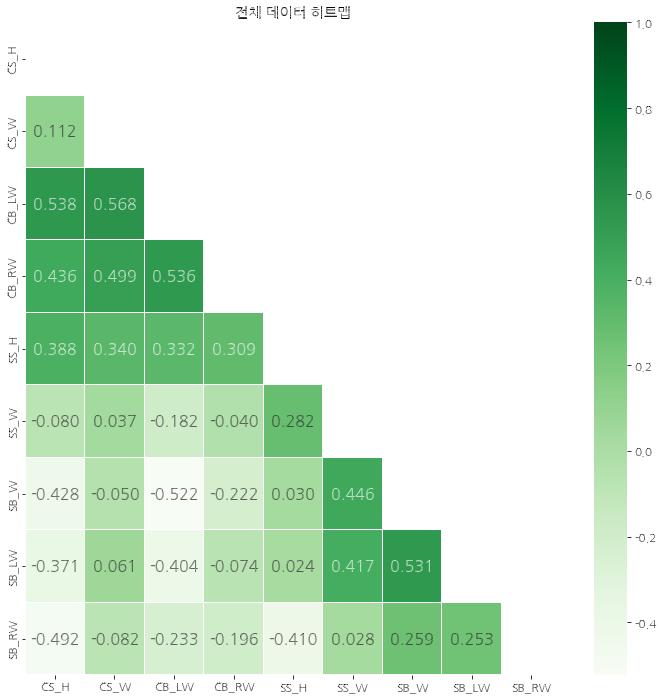

In [ ]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (12, 12)
mask = np.zeros_like(mean_cvm_df.corr())
mask[np.triu_indices_from(mask)] = True
all_cvm= sns.heatmap(data = mean_cvm_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')
all_cvm.set_title('전체 데이터 히트맵')

### 심선전단의 상관계수와 히트맵

In [ ]:
cs_cvm_df=cvm_df[['Det_CS', 'CS_H', 'CS_W']]
cs_cvm_df.corr()

,CS_H,CS_W
CS_H,1.000000,0.112317
CS_W,0.112317,1.000000


Text(0.5, 1.0, '심선전단 히트맵')

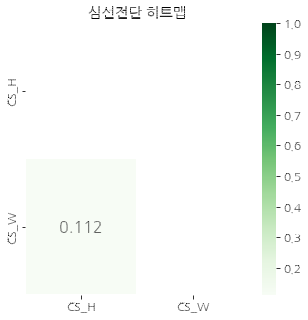

In [ ]:
mpl.rcParams['figure.figsize'] = (5,5)
mask = np.zeros_like(cs_cvm_df.corr())
mask[np.triu_indices_from(mask)] = True
cs= sns.heatmap(data = cs_cvm_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')
cs.set_title('심선전단 히트맵')

### 심선바렐의 상관계수와 히트맵

In [ ]:
cb_cvm_df=cvm_df[['Det_CB', 'CB_LW', 'CB_RW']]
cb_cvm_df.corr()

,CB_LW,CB_RW
CB_LW,1.000000,0.535639
CB_RW,0.535639,1.000000


Text(0.5, 1.0, '심선바렐 히트맵')

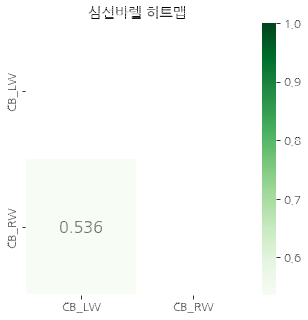

In [ ]:
mpl.rcParams['figure.figsize'] = (5,5)
mask = np.zeros_like(cb_cvm_df.corr())
mask[np.triu_indices_from(mask)] = True
cs= sns.heatmap(data = cb_cvm_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')
cs.set_title('심선바렐 히트맵')

### 피복전단 상관계수 및 히트맵

In [ ]:
ss_cvm_df=cvm_df[['Det_SS', 'SS_H', 'SS_W']]
ss_cvm_df.corr()

,SS_H,SS_W
SS_H,1.000000,0.281783
SS_W,0.281783,1.000000


Text(0.5, 1.0, '피복전단 히트맵')

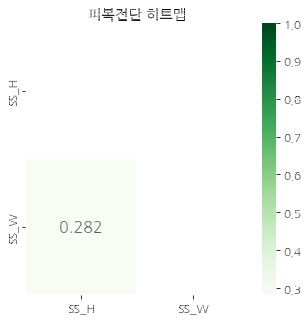

In [ ]:
mpl.rcParams['figure.figsize'] = (5,5)
mask = np.zeros_like(ss_cvm_df.corr())
mask[np.triu_indices_from(mask)] = True
cs= sns.heatmap(data = ss_cvm_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')
cs.set_title('피복전단 히트맵')

###피복바렐의 상관계수와 히트맵

In [ ]:
sb_cvm_df=cvm_df[['Det_SB', 'SB_W', 'SB_LW', 'SB_RW']]
sb_cvm_df.corr()

,SB_W,SB_LW,SB_RW
SB_W,1.000000,0.531496,0.258595
SB_LW,0.531496,1.000000,0.252854
SB_RW,0.258595,0.252854,1.000000


Text(0.5, 1.0, '피복전단 히트맵')

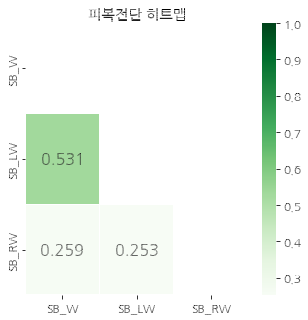

In [ ]:
mpl.rcParams['figure.figsize'] = (5,5)
mask = np.zeros_like(sb_cvm_df.corr())
mask[np.triu_indices_from(mask)] = True
cs= sns.heatmap(data = sb_cvm_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')
cs.set_title('피복전단 히트맵')

##심선바렐 왼쪽, 오른쪽 윙 값에 대한 그래프


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


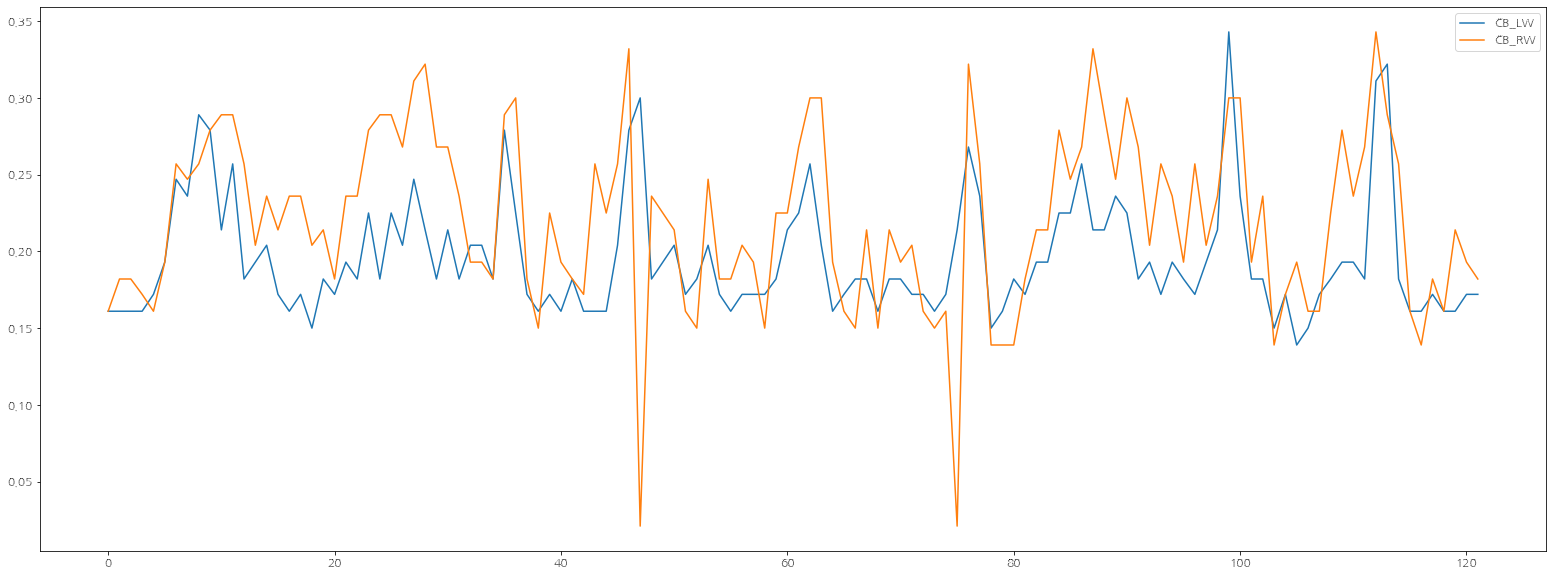

In [ ]:
cb_cvm_df['left_right_rate'] = (cb_cvm_df['CB_LW'] - cb_cvm_df['CB_RW'])
plt.figure(figsize=(27,10))
cb_cvm_df['CB_LW'].plot(label='CB_LW')
cb_cvm_df['CB_RW'].plot(label='CB_RW')
plt.legend()

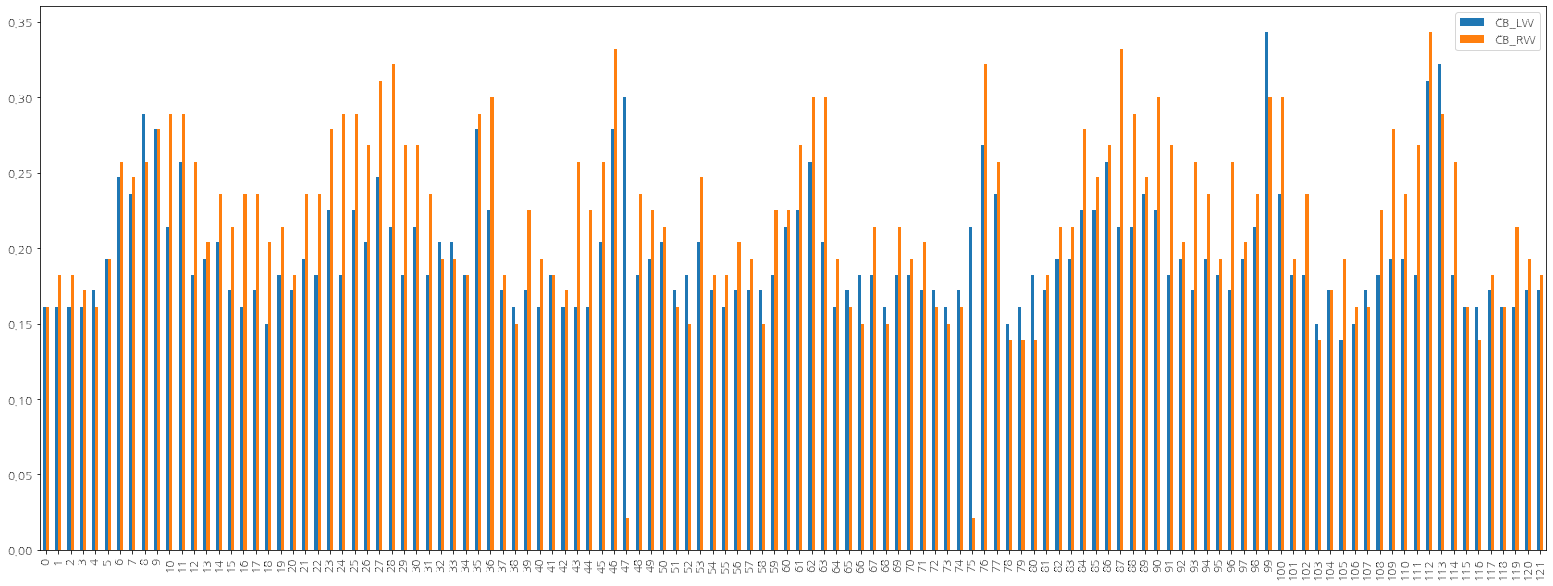

In [ ]:
cb_cvm_df[['CB_LW', 'CB_RW']].plot(kind='bar',figsize=(27,10))

##피복바렐 왼쪽, 오른쪽 윙 값에 대한 그래프

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


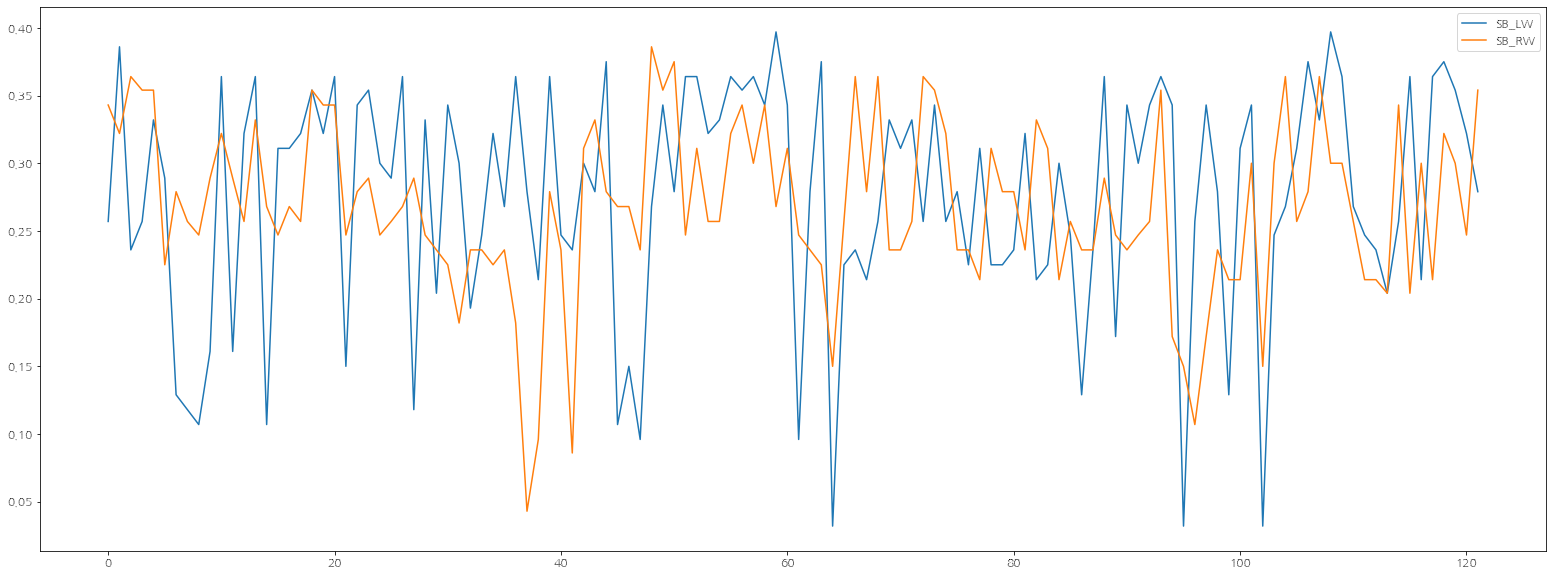

In [ ]:
sb_cvm_df['left_right_rate'] = (sb_cvm_df['SB_LW'] - sb_cvm_df['SB_RW'])
# sb_cvm_df['left_right_rate'].describe()

plt.figure(figsize=(27,10))
sb_cvm_df['SB_LW'].plot(label='SB_LW')
sb_cvm_df['SB_RW'].plot(label='SB_RW')
plt.legend()

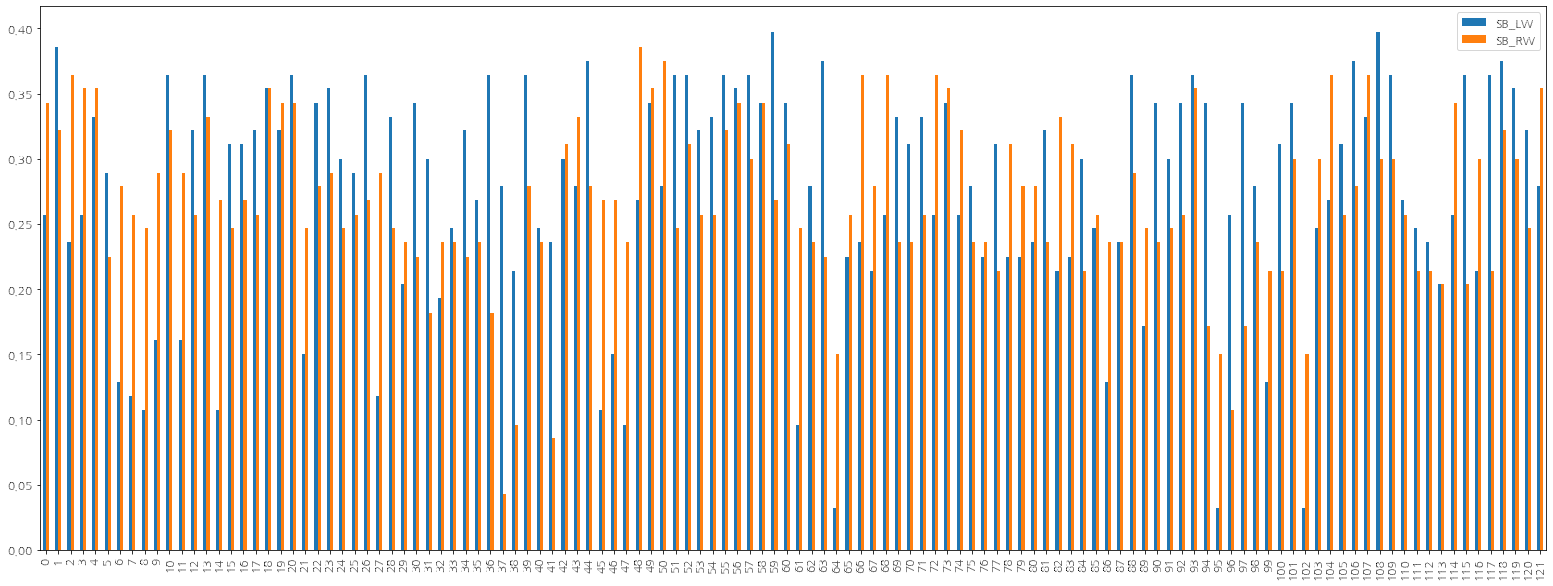

In [ ]:
sb_cvm_df[['SB_LW', 'SB_RW']].plot(kind='bar', figsize=(27,10))